<a href="https://colab.research.google.com/github/sinku29/Data-Science-Assignment/blob/main/Crimes_Clustering_Assignments1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statments:

### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### Import libraries

In [108]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [109]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Rename the "Unnamed" column as "State"

In [110]:
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [111]:
crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Checking the shape

In [112]:
crime.shape

(50, 5)

### Checking of null values

In [113]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Checking of duplicate values

In [114]:
crime[crime.duplicated(keep= False)]

,state,Murder,Assault,UrbanPop,Rape


**There is no duplicate values are present inside the data.**

###  Check in the statistics terms to get basic ideas

In [115]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Checking for the outliers with boxplot

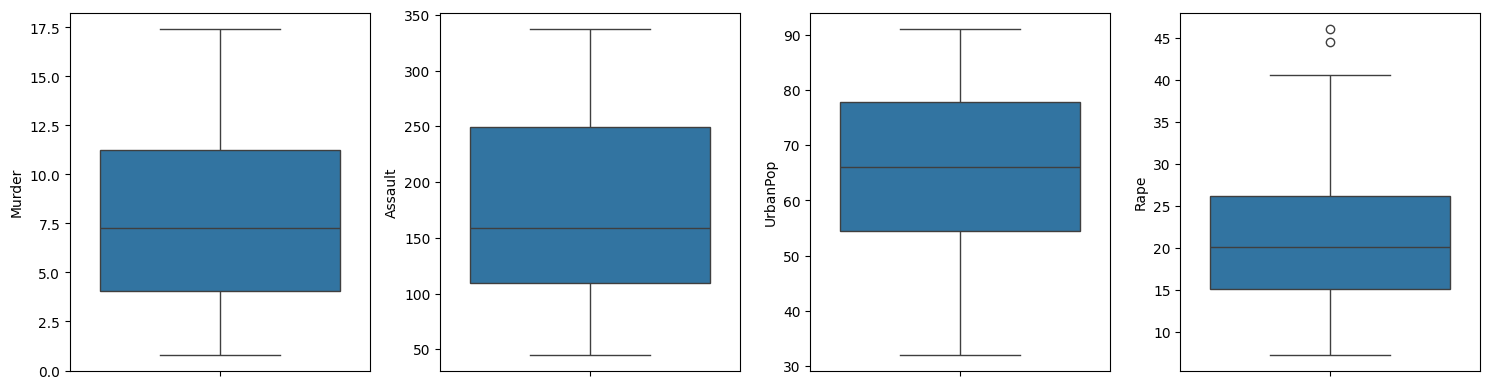

In [116]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
sns.boxplot(crime.Murder, ax=ax[0])
sns.boxplot(crime.Assault, ax=ax[1])
sns.boxplot(crime.UrbanPop, ax=ax[2])
sns.boxplot(crime.Rape, ax=ax[3])
plt.tight_layout()
plt.show()

### Cheking for the normal distribution in the data using distplot

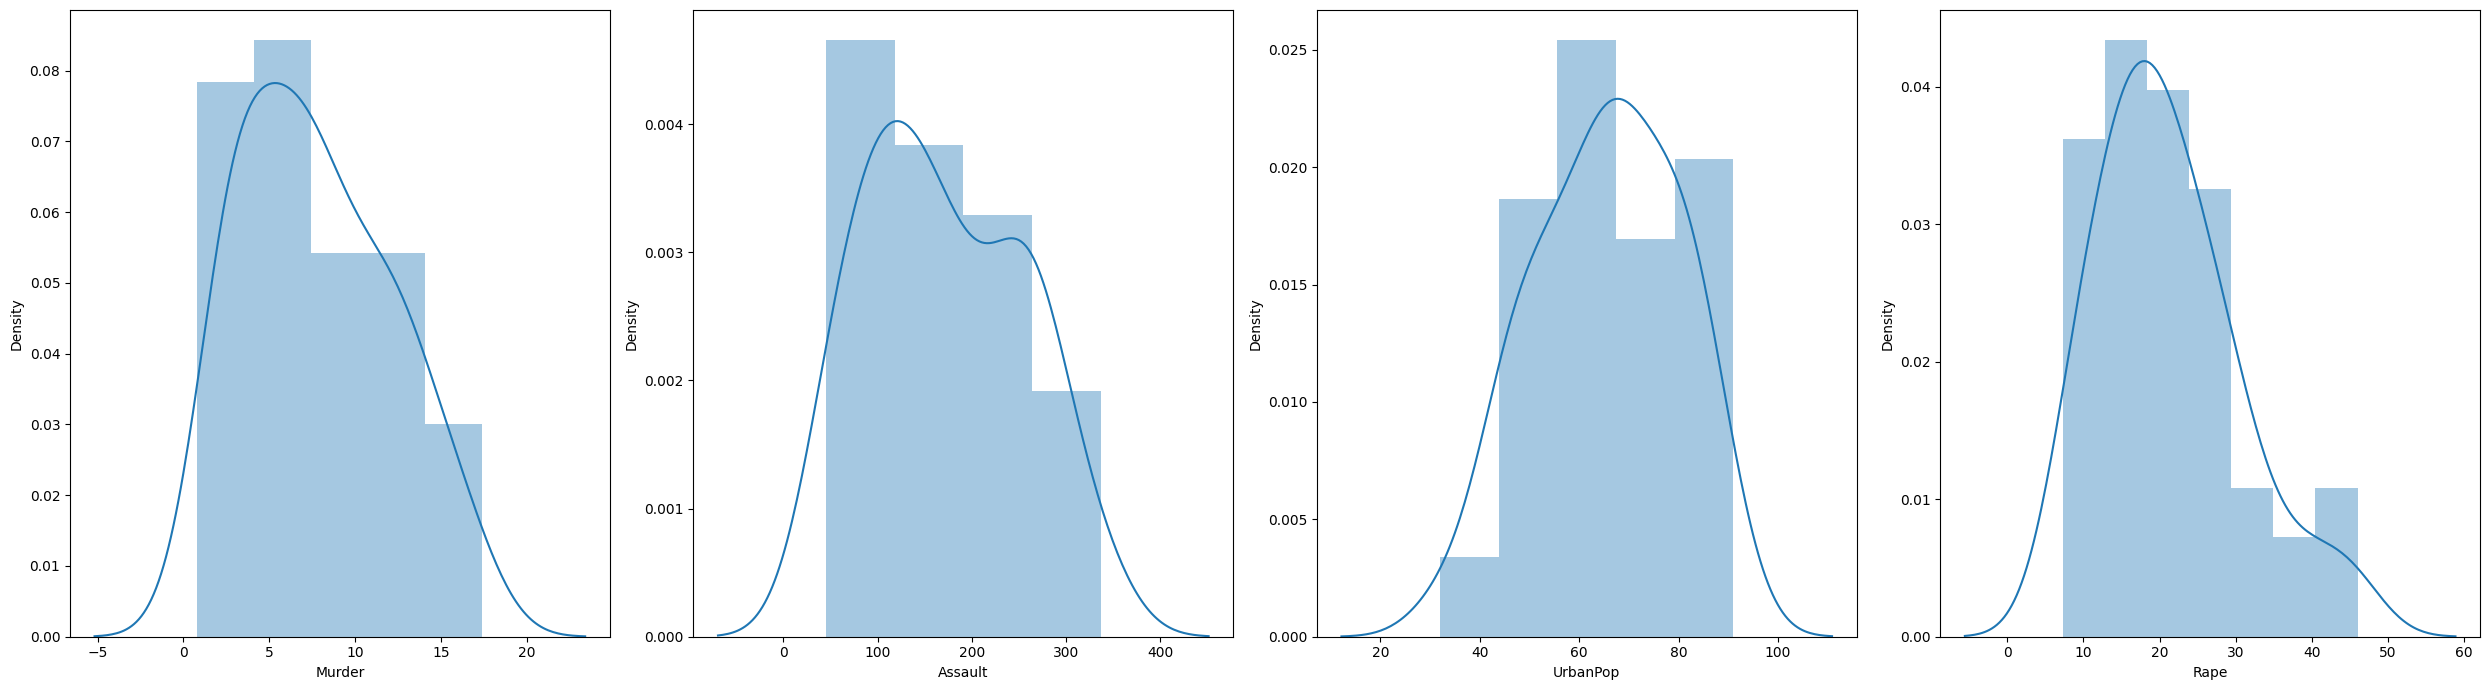

In [117]:
fig, ax = plt.subplots(1, 4, figsize=(25,7))
sns.distplot(crime.Murder, ax=ax[0])
sns.distplot(crime.Assault, ax=ax[1])
sns.distplot(crime.UrbanPop, ax=ax[2])
sns.distplot(crime.Rape, ax=ax[3])
plt.tight_layout()
plt.show()

### We will apply normalization on data because different fetures have different range

In [118]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [119]:
df_norm = norm_func(crime.iloc[:,1:])

### Normalized crime data

In [120]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### First we will apply the hierarchical clustering on crime data using single linkage

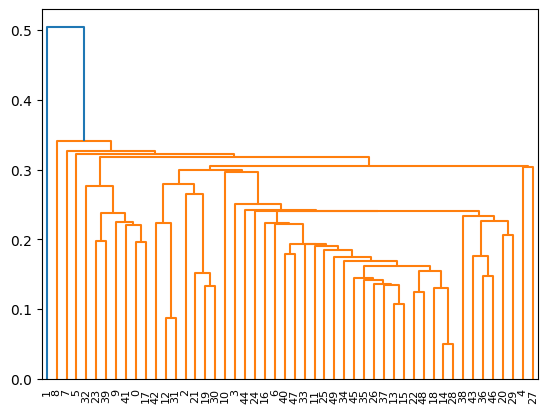

In [121]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

### Hierarchial Clustering with just 2 clusters

In [122]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [123]:
y_hc1 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [124]:
crime['cluster'] = y_hc1

In [125]:
#crime_means = crime.groupby('cluster').agg('mean').reset_index()

### Viewing the data in each cluster

In [126]:
for i in range(2):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Alabama | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Maryland | Massachusetts | Michigan | Minnesota | Mississippi | Missouri | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming
Total Members: 49

cluster 1
The Members: Alaska
Total Members: 1



### We can clearly see this method is not giving proper result so we will try different method for identify best no. of clusters

In [127]:
crime = pd.read_csv("crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [128]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

### Hierarchial clustering with average linkage

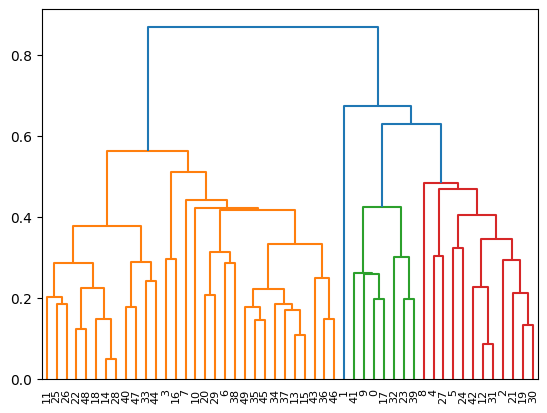

In [129]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [130]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [131]:
y_hc2 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

### Creating a new cluster column with the average linkage cluster labels

In [132]:
crime['cluster'] = y_hc2

In [133]:
#crime.groupby('cluster').agg(['mean']).reset_index()

### Viewing the values in each cluster

In [134]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Arkansas | Connecticut | Delaware | Hawaii | Idaho | Indiana | Iowa | Kansas | Kentucky | Maine | Massachusetts | Minnesota | Montana | Nebraska | New Hampshire | New Jersey | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Dakota | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming
Total Members: 30

cluster 1
The Members: Arizona | California | Colorado | Florida | Illinois | Maryland | Michigan | Missouri | Nevada | New Mexico | New York | Texas
Total Members: 12

cluster 2
The Members: Alaska
Total Members: 1

cluster 3
The Members: Alabama | Georgia | Louisiana | Mississippi | North Carolina | South Carolina | Tennessee
Total Members: 7



### Now we will apply the complete linkage method

In [135]:
crime = pd.read_csv("crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [136]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

### Hierarchial clustering with complete linkage

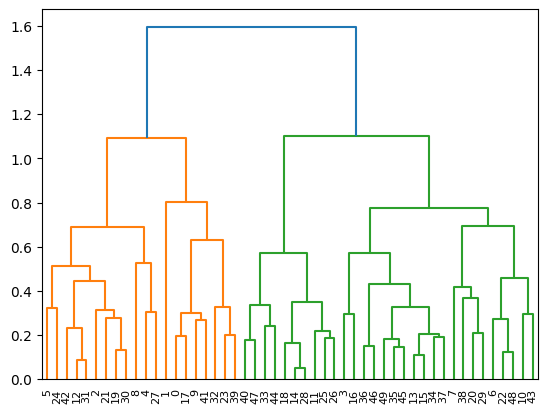

In [137]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [138]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [139]:
y_hc3 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

### Creating a new cluster column with the average linkage cluster labels

In [140]:
crime['cluster'] = y_hc3

In [141]:
#crime.groupby('cluster').agg(['mean']).reset_index()

TypeError: Could not convert AlabamaAlaskaGeorgiaLouisianaMississippiNorth CarolinaSouth CarolinaTennessee to numeric

### Viewing the values in all the 4 clusters, built using complete linkage method

In [ ]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

### Now we will apply the ward(centroid) linkage method

In [ ]:
crime = pd.read_csv("crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [ ]:
y_hc4 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

In [ ]:
crime['cluster'] = y_hc4

In [ ]:
crime.groupby('cluster').agg(['mean']).reset_index()

### Viewing the values in all the 4 clusters, built using centroid linkage method

In [ ]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

## Now we will apply the K means clustring for cross check the results of hierarchical clustering

In [ ]:
crime = pd.read_csv("crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

### User defined function to normalize the values

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

### Plotting elbow curve to determine the best number of clusters to be used in KMeans

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Creating a Kmeans cluster with 4 groups

In [ ]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

In [ ]:
KM_label=clusters_new.labels_

In [ ]:
crime['cluster'] = clusters_new.labels_

In [ ]:
clusters_new.cluster_centers_

In [ ]:
crime.groupby('cluster').agg(['mean']).reset_index()

### Viewing the values in each of the Kmeans cluster

In [ ]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

## Now we will apply the DBSCAN clustring for cross check the results of hierarchical clustering and Kmeans clustering

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(df_norm)

In [ ]:
dbscan.labels_

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])
cl.head()

In [ ]:
crime['clust_db_scan']=cl.cluster_db

### Importing the metrics for calculating silhouette score

In [ ]:
s1=(metrics.silhouette_score(df_norm,y_hc1))
s1

In [ ]:
s2=(metrics.silhouette_score(df_norm,y_hc2))
s2

In [ ]:
s3=(metrics.silhouette_score(df_norm,y_hc3))
s3

In [ ]:
s4=(metrics.silhouette_score(df_norm,y_hc4))
s4

In [ ]:
s5=(metrics.silhouette_score(df_norm,clusters_new.labels_))
s5

In [ ]:
s6=(metrics.silhouette_score(df_norm,cl.cluster_db))
s6

### Consolidating

In [ ]:
t={'Model':['Single','Average','Complete','Ward','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
t=pd.DataFrame(t)
t

In [ ]:
visualize = pd.DataFrame(clusters_new.cluster_centers_)
visualize = visualize.T
visualize['column'] = ['Murder','Assault','UrbanPop','Rape']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()

## Conclusion:
### Four clusters are good to classify the crime rate states.
### From different models and visualizations, it is evident that the hiererachial clustering with average linkage method have the highest silhouette score.
### Higher the silhouette score, more far are the clusters seperated from each other

### Cluster 3 has high crime & high popultion rate with the kmeans clustering method
### Cluster 2 has low crime & low popultion rate with the kmeans clustering method
### Cluster 1 has high murder, assault & low popultion rate with the kmeans clustering method
### Cluster 0 has low crime & high popultion rate with the kmeans clustering method